In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../Pyfiles')

# Pull in the helper files.
from ImageRead import *
from AmplitueEncoding import *

# Amplitue Encoding Filter
Saesun Kim

This is the amplitue encording filter to detect the location of the cloud

In [4]:
# Import the storm image
pathY=r'..\\dataset\\Original\\storm\\'
pathN=r'..\\dataset\\Original\\No-storm\\'
nameN='no_storm'
nameY='storm'
inputY=[imageResize(callImage(i+1,pathY,nameY),16) for i in range(25)]
inputN=[imageResize(callImage(i+1,pathN,nameN),16) for i in range(25)]
input_combine = inputY+inputN

In [6]:
np.random.seed(0)
idx=np.array([int(i) for i in range(50)]).flatten()
np.random.shuffle(idx)

dataInput = list(input_combine[i] for i in idx )
dataTarget = list(imageBinarize(input_combine[i]) for i in idx )

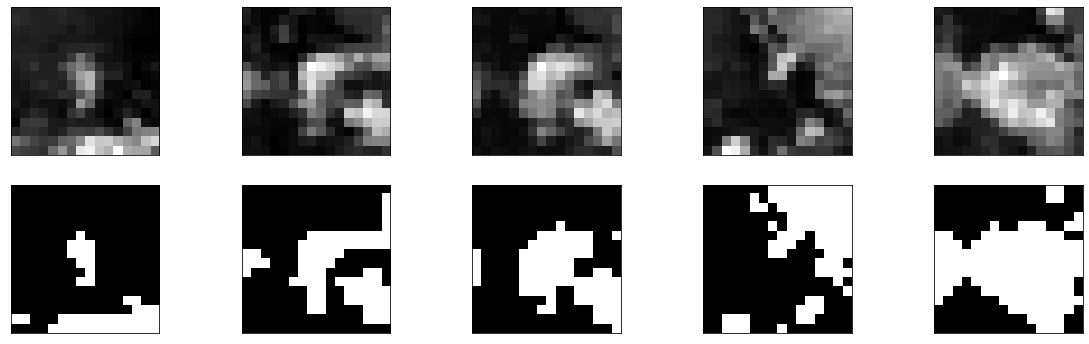

In [7]:
n_samples_show = 5
fig, axes = plt.subplots(nrows=2, ncols=n_samples_show, figsize=(20, 6))

for i in range(5):

    axes[0,i].imshow(dataInput[i], cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])

    axes[1,i].imshow(dataTarget[i], cmap='gray')
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])

# Amplitude Encoding

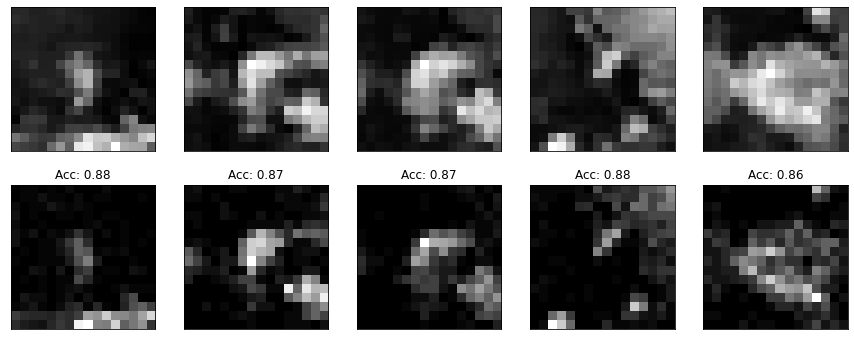

In [8]:
# Amplitue Encoding result

n_samples_show = 5
fig, axes = plt.subplots(nrows=2, ncols=n_samples_show, figsize=(15, 6))

for i in range(5):

    axes[0,i].imshow(dataInput[i], cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])

    axes[1,i].imshow(AmpltudeEncoding(dataInput[i],dataTarget[i])[0], cmap='gray')
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])
    axes[1,i].set_title("Acc: {}".format(round(AmpltudeEncoding(dataInput[0],dataTarget[0])[1],2)))

# Amplitude Filter

c:\Users\Saesun Kim\Documents\Hackathon2021\SRRSA\Notebooks\../Pyfiles\AmplitueEncoding.py:56: RuntimeWarning: invalid value encountered in true_divide
  return out_img/max(listdata)
C:\Users\Saesun Kim\anaconda3\envs\qiskit\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\Saesun Kim\anaconda3\envs\qiskit\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


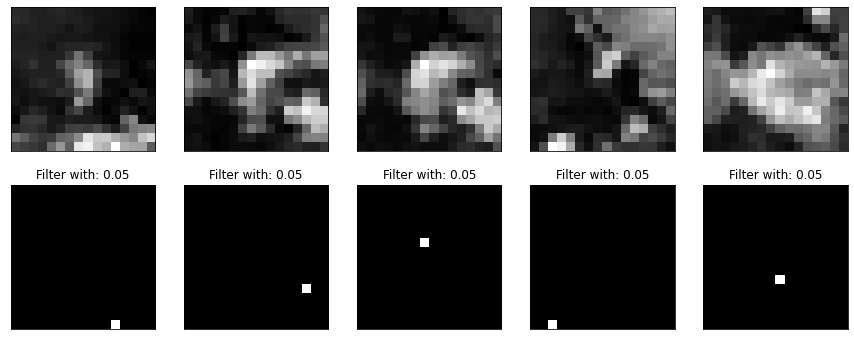

In [8]:
# Save the filtering Results

nqubits=8;
nshot=10000;
n_samples_show = 5
fig, axes = plt.subplots(nrows=2, ncols=n_samples_show, figsize=(15, 6))
filter= 0.05

filterlist=[j for j in range(50)]
for j in filterlist:
    for i in range(5):

        axes[0,i].imshow(dataInput[i], cmap='gray')
        axes[0,i].set_xticks([])
        axes[0,i].set_yticks([])

        axes[1,i].imshow(AmpltudeEncodingFilter(dataInput[i],round(0.001*(j+1),3)), cmap='gray')
        axes[1,i].set_xticks([])
        axes[1,i].set_yticks([])
        axes[1,i].set_title("Filter with: {}".format(round(0.001*(j+1),3)))
    #fig.savefig("../result/AmplitudeFilter/Amplitude-filter-"+str(j)+".jpg")    

# Video

In [2]:
path=r'..\\dataset\\Original\\Videoframe\\video\\'

name='video-'
data=[imageResize(callImage(i+1,path,name),32) for i in range(100)]


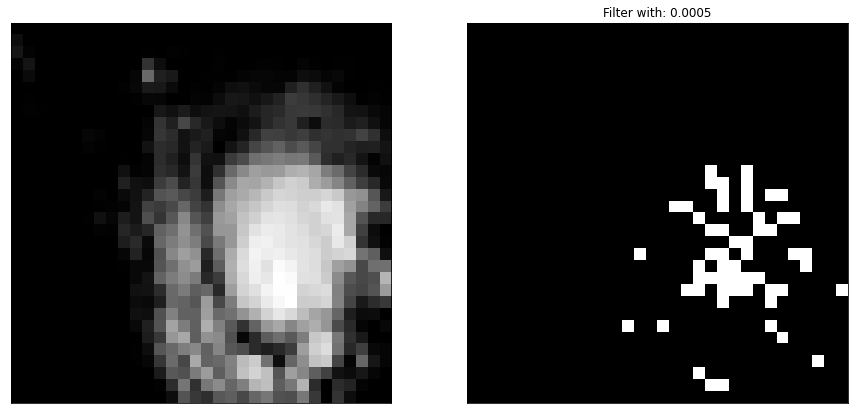

In [3]:


n_samples_show = 2
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(15, 15))
filter= 0.0005

for i in range(5):
    axes[0].imshow(data[i], cmap='gray')
    axes[0].set_xticks([])
    axes[0].set_yticks([])

    axes[1].imshow(AmpltudeEncodingFilter32(data[i],filter), cmap='gray')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_title("Filter with: {}".format(filter))
